In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt


## Implementação de um filtro FIR passa baixa para filtragem de sinais de audio
### pfv, quando tu terminar de entender o código, reorganiza ele, o bixinho ta todo bagunçado 

In [ ]:
#leitura do arquivo de audio

audio = wave.open('sample1.wav', 'rb')
tamanho_audio = audio.getnframes()
frequencia_amostragem = audio.getframerate()

dados_16bit = audio.readframes(audio.getnframes())
audio_array = np.frombuffer(dados_16bit, dtype=np.int16)
max_abs = np.max(np.abs(audio_array))
audio_normalizado = audio_array/max_abs
print(audio_array[:10000])                  #print para debugar


[    0     0     0 ... -1534  -807  -201]


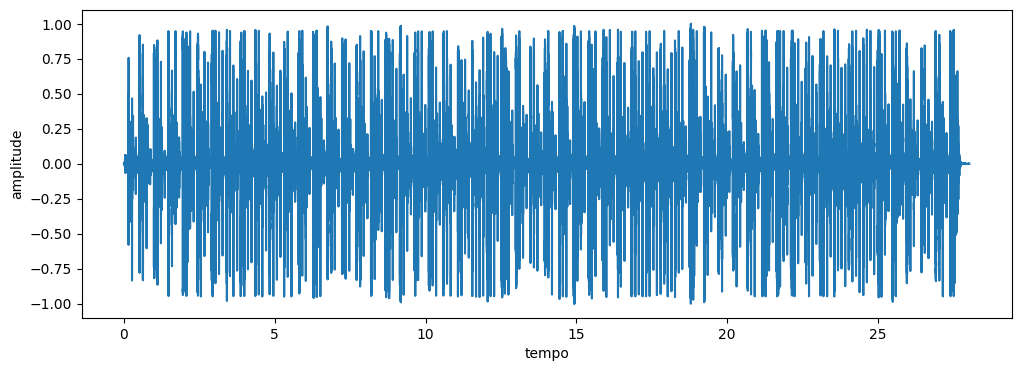

1236096


In [ ]:
tempo = np.linspace(0, tamanho_audio / frequencia_amostragem, num= tamanho_audio)       #esse é o tempo que vai ser redeclarado nas ultimas células

plt.figure(figsize=(12,4))
plt.plot(tempo, audio_normalizado)
plt.ylabel("amplitude")
plt.xlabel("tempo")
plt.show()

### Visualização no espaço da frequência

(0.0, 2000.0)

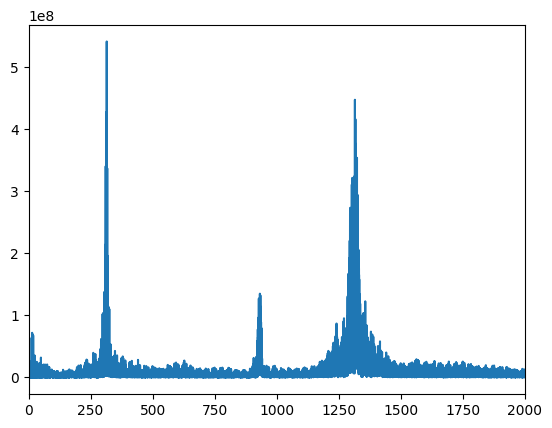

In [5]:
periodo_amostragem = 1/frequencia_amostragem

frequencias = np.fft.fftfreq(tamanho_audio, periodo_amostragem)
transf = np.fft.fft(audio_array)
transf = np.abs(transf)

plt.figure()
plt.plot(frequencias[frequencias>0], transf[frequencias>0])
plt.xlim(0,2000)

### Projeção do filtro:

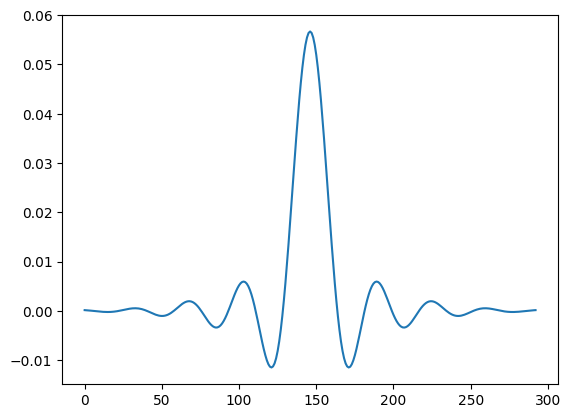

In [28]:
import math

# Toda essa matematica abaixo serve pra criar o filtro de fato e ele funciona a partir dos seguintes principios:

# A função sinc é muito utilizada para o projeto de filtros passa-baixa FIR pois ele consegue emular o comportamento
# de um filtro ideal (que corta toda frequencia após a frequencia de corte). Junto a isso, a janela de hamming pode ser
# usada para "filtrar" os picos da função sinc, mantendo apenas o pico principal (apesar de eu achar que essa parte
# não está funcionando muito bem).

# As variaveis referentes a frequencias são utilizadas no projeto do filtro, definindo onde até onde o filtro deve
# permitir a passagem de 100% do sinal, onde ele deve começar a atenuação e onde a saída deve ser 0%. Imagino que,
# pelo estado onde me encontro, algumas dessas variáveis foram declaradas e calculadas mas não foram utilizadas pois
# loucuras aconteceram durante a implementação, peço perdão e que por favor exclua caso encontre alguma desse jeito.


 
f_corte =  1250                                 #frequencia até onde há passagem de sinal
f_passagem = 750                                #frequencia até onde o sinal passa sem atenuação alguma
f_amostragem = frequencia_amostragem            #taxa de amostragem do sinal original

#normalização das frequencias:
w_corte = (f_corte/(f_amostragem/2))*np.pi
w_passagem = (f_passagem/(f_amostragem/2))*np.pi

w_transicao = w_corte - w_passagem
w_corte_intermediario = w_transicao/2

hamming = np.hamming(100)

comprimento_filtro = np.ceil((6.6*np.pi/w_transicao)+1)

M = math.ceil((6.6 * np.pi / w_transicao))
if M % 2 == 0:
        M +=1

n = np.arange(M) - (M - 1) // 2
hd = (w_corte/np.pi) * np.sinc(w_corte * n / np.pi)
hamming = np.hamming(M)

h = hd * hamming

plt.plot(h)


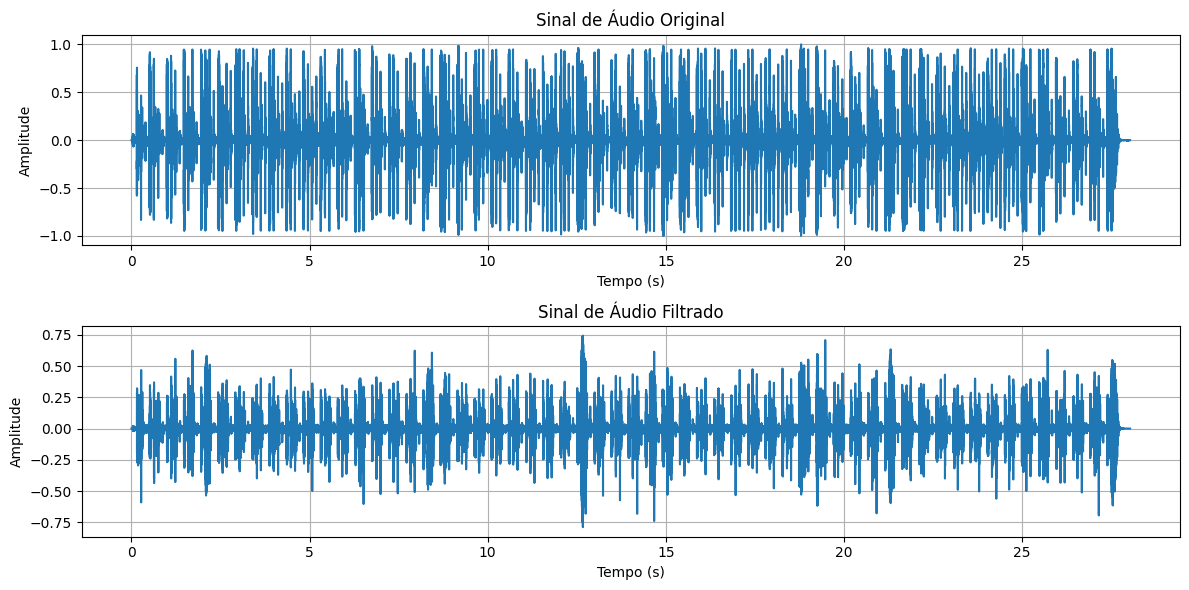

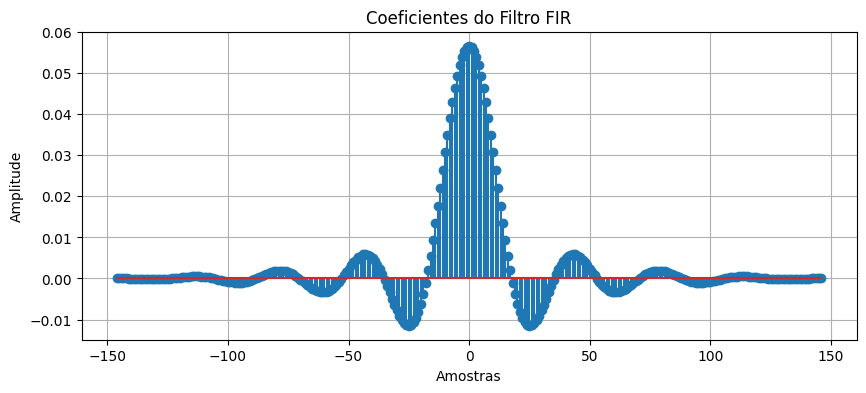

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# 1. Aplicar o filtro
audio_filtrado = lfilter(h, 1.0, audio_normalizado)

# 2. Criar vetor de tempo adequado para o áudio                                                     #criado pois por algum motivo o tempo que foi determinado la encima não funciona 
tempo = np.linspace(0, len(audio_normalizado)/frequencia_amostragem, num=len(audio_normalizado))

# 3. Plotar CORRETAMENTE:                                                                           #esse caps lock foi o deepseek me chamando de burro :(
plt.figure(figsize=(12, 6))

# Plot do sinal original
plt.subplot(2, 1, 1)
plt.plot(tempo, audio_normalizado)
plt.title('Sinal de Áudio Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot do sinal filtrado
plt.subplot(2, 1, 2)
plt.plot(tempo, audio_filtrado)
plt.title('Sinal de Áudio Filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Plot separado para os coeficientes do filtro
plt.figure(figsize=(10, 4))
plt.stem(n, h)  # Aqui usamos n que é o vetor correto para os coeficientes
plt.title('Coeficientes do Filtro FIR')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

(0.0, 2000.0)

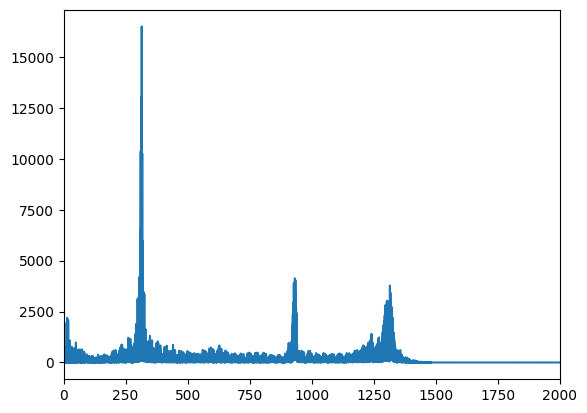

In [ ]:
#visualização no campo das frequências, porém dessa vez do audio filtrado

frequencias = np.fft.fftfreq(tamanho_audio, periodo_amostragem)
transf = np.fft.fft(audio_filtrado)
transf = np.abs(transf)

plt.figure()
plt.plot(frequencias[frequencias>0], transf[frequencias>0])
plt.xlim(0,2000)